In [105]:
%matplotlib inline

0.002281080379703341 0.435229956785699


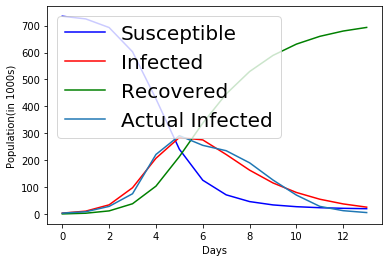

In [139]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
from scipy.optimize import minimize
from scipy.integrate import odeint
import numpy as np 
import pandas as pd

#read in Flu dataset
Flu_Data = pd.read_csv ("C:/Users/antob/OneDrive - Broward College/_FSU_/5 - SPRING 2020/UROP/Project/BoardingSchool.csv" , index_col = 0)
#Adds obs numbers that I treat as a time series ID or a time variable 
Flu_Data["T"] = np.arange(len(Flu_Data))
Flu_Data = np.array(Flu_Data)
t = Flu_Data[:,2]

#total population 
N = 738
#Initial number of infected: 
I0 = 3
#Number of initial recovered: 
R0 = 0
#The number of susceptible: 
S0 = N - I0 - R0

#Makes a squared error eqation 
def sumsq(p):
    beta, gamma = p
    def SIR (y, t, N, beta, gamma):
        S, I, R = y
        dSdt = (-beta * S * I)
        dIdt = (beta * S * I) - gamma * I
        dRdt = (gamma*I)
        return dSdt, dIdt, dRdt
    Y0 = S0, I0, R0
    sol = odeint(SIR, Y0, t, args = (N, beta, gamma))
    S, I, R = sol.T
    return(sum((I- Flu_Data[:,0])**2))

#Minimizes the squared error 
msol = minimize(sumsq,(.001,.06),method='Nelder-Mead')
msol.x

#Breaks the array up and assigns back to beta and gamma
beta, gamma = msol.x


#SIR equation 
def SIR (y, t, N, beta, gamma):
    S, I, R = y
    dSdt = (-beta * S * I)
    dIdt = (beta * S * I) - gamma * I
    dRdt = (gamma*I) 
    return dSdt, dIdt, dRdt

#Initial condition vector: 
Y0 = S0, I0, R0
print (beta, gamma)


#Solves the Eqation
sol = odeint(SIR, Y0, t, args = (N, beta, gamma))
S, I, R = sol.T
#print (sol.T)

#Graphs the eqation
plt.plot (Flu_Data[:,2], S, c= "b", label = 'Susceptible')
plt.plot (Flu_Data[:,2], I, c="r", label = 'Infected')
plt.plot (Flu_Data[:,2], R, c="g",label = 'Recovered')
plt.plot (Flu_Data[:,2], Flu_Data[:,0], label = "Actual Infected")

plt.ylabel("Population(in 1000s)") 
plt.xlabel ('Days')
plt.legend(prop={"size":20})
plt.show()  


